# **Create a neural network model to detect breast cancer using the Wisconsin Diagnostic Breast Cancer (WDBC) dataset -- Using CNN**

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
x= data.data
y= data.target

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
# Reshape the data to fit CNN input requirements
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [16]:
## applying CNN methods
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, recall_score

In [18]:
model = models.Sequential([
    Conv1D(32,kernel_size=3,activation='relu',input_shape=(x_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [19]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [22]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
10/10 [==============================] - 3s 67ms/step - loss: 0.6841 - accuracy: 0.6020 - val_loss: 0.5515 - val_accuracy: 0.8442
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4949 - accuracy: 0.8257 - val_loss: 0.4066 - val_accuracy: 0.8961
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.3773 - accuracy: 0.8816 - val_loss: 0.2996 - val_accuracy: 0.8961
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.2874 - accuracy: 0.9013 - val_loss: 0.2463 - val_accuracy: 0.8961
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.2100 - accuracy: 0.9309 - val_loss: 0.2169 - val_accuracy: 0.8961
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.2084 - accuracy: 0.9211 - val_loss: 0.1966 - val_accuracy: 0.9091
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.1821 - accuracy: 0.9408 - val_loss: 0.1819 - val_accuracy: 0.9091
Epoch 

In [24]:
# Evaluate the model
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculate accuracy and sensitivity
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")

6/6 [==============================] - 0s 7ms/step
Accuracy: 0.96
Sensitivity: 0.98


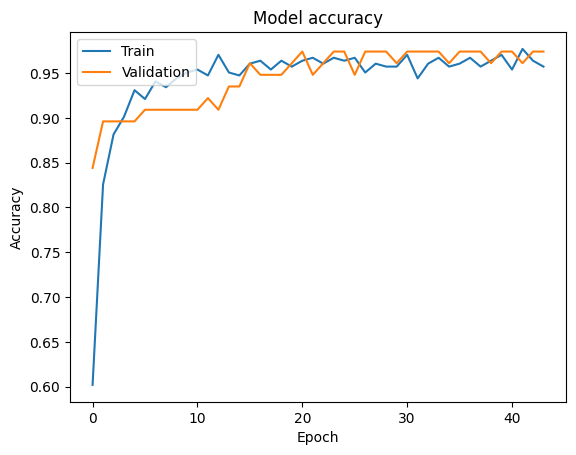

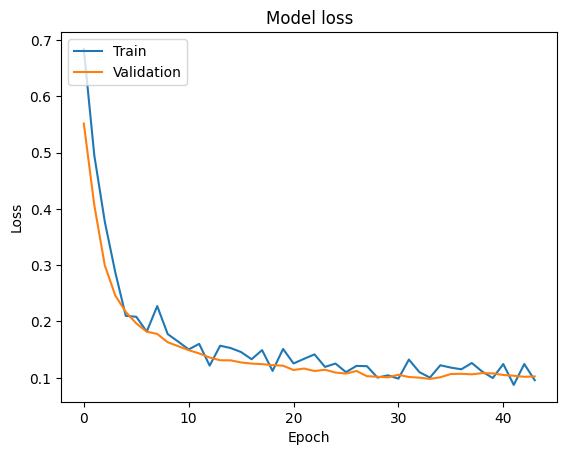

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
